#Skygeni Task - Data Engineer Assignment

###Pottumkal Allen Jose (12208329), LPU.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
# Upload the datasets in the google colab 'Files' menu
financial_df = pd.read_csv("/content/finanical_information.csv")
industry_df = pd.read_csv("/content/industry_client_details.csv")
payment_df = pd.read_csv("/content/payment_information.csv")
subscription_df = pd.read_csv("/content/subscription_information.csv")

# Q1: How many finance lending and blockchain clients does the organization have?
finance_clients = industry_df[industry_df['industry'].str.contains('Finance Lending', case=False)]
blockchain_clients = industry_df[industry_df['industry'].str.contains('Block Chain', case=False)]
total_clients = len(finance_clients) + len(blockchain_clients)
print(f"Total Finance Lending & Blockchain Clients: {total_clients}")

Total Finance Lending & Blockchain Clients: 47


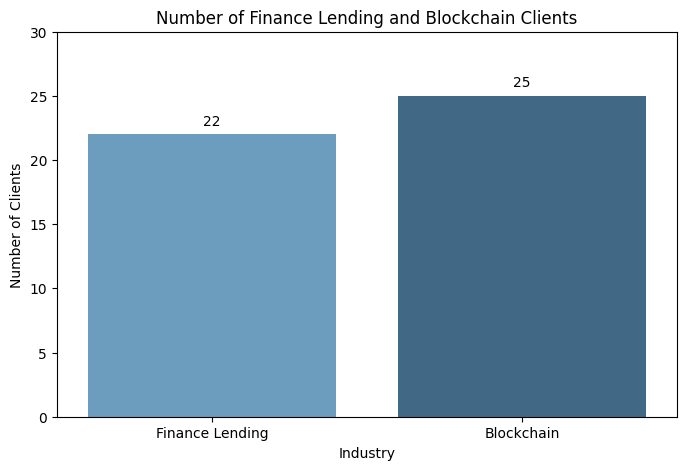

In [18]:
# Data for visualization using corrected counts
clients = {'Finance Lending': len(finance_clients), 'Blockchain': len(blockchain_clients)}
industries = list(clients.keys())
counts = list(clients.values())

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=industries, y=counts, hue=industries, palette='Blues_d')
plt.title('Number of Finance Lending and Blockchain Clients')
plt.xlabel('Industry')
plt.ylabel('Number of Clients')
plt.ylim(0, max(counts) * 1.2)  # Add some space above bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
plt.savefig('/content/q1_plot.png')
plt.show()

In [19]:
merged_df = pd.merge(subscription_df, industry_df, on="client_id", how="left")
industry_renewal_rates = merged_df.groupby('industry')['renewed'].mean() * 100
highest_industry = industry_renewal_rates.idxmax()
highest_rate = industry_renewal_rates.max()
print(f"Industry with the highest renewal rate: {highest_industry} ({highest_rate:.2f}%)")

Industry with the highest renewal rate: Gaming (72.73%)


In [20]:
print(industry_renewal_rates.sort_values(ascending=False))

industry
Gaming             72.727273
AI                 63.636364
Finance Lending    54.545455
Hyper Local        45.000000
Block Chain        44.000000
Name: renewed, dtype: float64


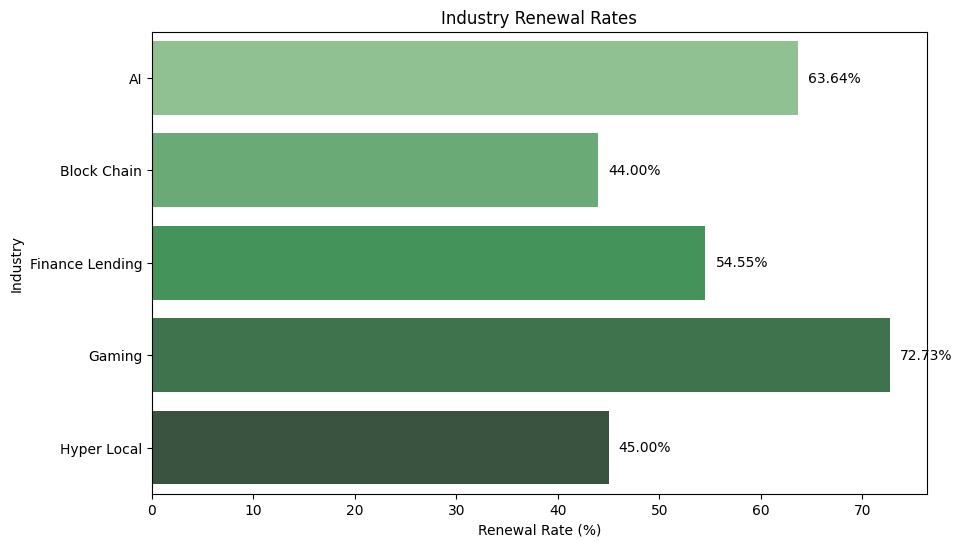

In [21]:
# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_renewal_rates.values, y=industry_renewal_rates.index, hue=industry_renewal_rates.index, palette='Greens_d')
plt.title('Industry Renewal Rates')
plt.xlabel('Renewal Rate (%)')
plt.ylabel('Industry')
# Highlight the highest renewal rate
max_idx = industry_renewal_rates.idxmax()
for i, (index, value) in enumerate(industry_renewal_rates.items()):
    plt.text(value + 1, i, f'{value:.2f}%', va='center')
    if index == max_idx:
        plt.gca().get_children()[i].set_color('darkgreen')  # Highlight max bar
plt.savefig('/content/q2_plot.png')  # Save for submission
plt.show()

In [22]:
# Step 1: Convert to datetime just to be safe
subscription_df['end_date'] = pd.to_datetime(subscription_df['end_date'])
financial_df['end_date'] = pd.to_datetime(financial_df['end_date'])

# Step 2: Merge on 'end_date' using merge_asof (handles slight mismatches in date)
subscription_df = subscription_df.sort_values('end_date')
financial_df = financial_df.sort_values('end_date')

merged_df = pd.merge_asof(
    subscription_df,
    financial_df,
    on='end_date',
    direction='backward'  # or 'nearest', depending on what makes sense
)

# Step 3: Filter only renewed subscriptions
renewed_df = merged_df[merged_df['renewed'] == True]

# Step 4: Compute the average inflation rate
avg_inflation = renewed_df['inflation_rate'].mean()

print(f"Average Inflation Rate at Renewal: {avg_inflation:.2f}%")


Average Inflation Rate at Renewal: 4.78%


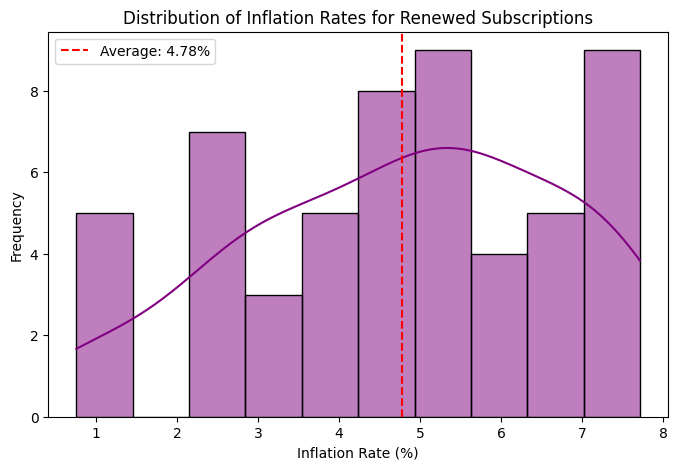

In [23]:
# Create histogram
plt.figure(figsize=(8, 5))
sns.histplot(renewed_df['inflation_rate'].dropna(), bins=10, kde=True, color='purple')
plt.title('Distribution of Inflation Rates for Renewed Subscriptions')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Frequency')

# Mark average inflation rate
plt.axvline(avg_inflation, color='red', linestyle='--', label=f'Average: {avg_inflation:.2f}%')
plt.legend()
plt.savefig('/content/q3_plot.png')
plt.show()

In [24]:
# Q4: Median yearly payment for all payment methods
# Convert payment_date to datetime
payment_df['payment_date'] = pd.to_datetime(payment_df['payment_date'])

# Extract year from payment_date
payment_df['year'] = payment_df['payment_date'].dt.year

# Group by year, client_id, and payment_method to get yearly payments
yearly_payments = payment_df.groupby(['year', 'client_id', 'payment_method'])['amount_paid'].sum().reset_index()

# Now calculate median yearly payment per payment method
median_by_method = yearly_payments.groupby('payment_method')['amount_paid'].median()

# Display result
print("Median Yearly Payment by Payment Method:\n")
print(median_by_method)


Median Yearly Payment by Payment Method:

payment_method
Bank Transfer    238.3
Check            365.6
Credit Card      291.0
Name: amount_paid, dtype: float64


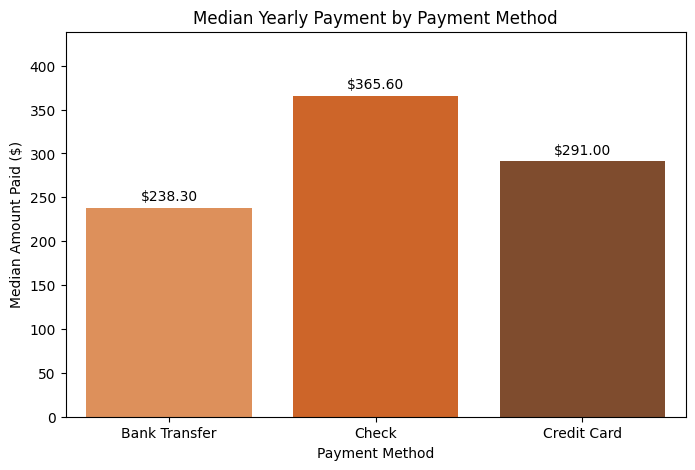

In [25]:
# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=median_by_method.index, y=median_by_method.values, hue=median_by_method.index, palette='Oranges_d')
plt.title('Median Yearly Payment by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Median Amount Paid ($)')
plt.ylim(0, max(median_by_method.values) * 1.2)  # Add space above bars
for i, value in enumerate(median_by_method.values):
    plt.text(i, value + 5, f'${value:.2f}', ha='center', va='bottom')
plt.savefig('/content/q4_plot.png')  # Save for submission
plt.show()

In [28]:
from google.colab import files
files.download('/content/q1_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
files.download('/content/q2_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
files.download('/content/q3_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
files.download('/content/q4_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>